In [24]:
import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import math
from sklearn.preprocessing import LabelEncoder

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# About Dataset

Dataset ini merekam keseluruhan perjalanan pelanggan dalam sebuah platform e-commerce. Mulai dari pelanggan melakukan pemesanan, pembayaran diproses, barang dikirim oleh seller, hingga akhirnya diterima oleh pelanggan. 

**Data Dictionary**
| Kolom                             | Deskripsi                                                                                                                                           |
| --------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **order_id**                      | ID unik untuk setiap transaksi pelanggan, digunakan sebagai identifikasi utama order dan perhitungan jumlah transaksi (Frequency).                  |
| **customer_id**                   | ID unik pelanggan, digunakan untuk membangun profil customer dan melakukan segmentasi berbasis RFM.                                                 |
| **order_status**                  | Status pesanan (delivered, shipped, cancelled, dll.), berguna untuk mengevaluasi kualitas pengalaman pelanggan dan filtering transaksi valid.       |
| **order_purchase_timestamp**      | Waktu pesanan dilakukan, digunakan untuk menghitung Recency (jarak waktu pembelian terakhir).                                                       |
| **order_approved_at**             | Waktu pembayaran disetujui, mencerminkan validasi transaksi yang berhasil diproses.                                                                 |
| **order_delivered_timestamp**     | Waktu pesanan diterima pelanggan, digunakan untuk analisis performa pengiriman dan customer satisfaction.                                           |
| **order_estimated_delivery_date** | Perkiraan tanggal pengiriman, digunakan untuk mengukur ketepatan waktu (delivery delay analysis).                                                   |
| **product_id**                    | ID unik produk yang dibeli pelanggan, digunakan untuk analisis preferensi produk dan product affinity per segment.                                  |
| **seller_id**                     | Identifikasi penjual, digunakan untuk menganalisis kontribusi seller terhadap revenue dan pengalaman pelanggan.                                     |
| **price**                         | Harga produk yang dibeli, menjadi komponen utama dalam perhitungan Monetary (nilai transaksi) pada analisis RFM.                                    |
| **shipping_charges**              | Biaya pengiriman yang dibayar pelanggan, dapat dianalisis untuk melihat pengaruh ongkir terhadap keputusan pembelian.                               |
| **product_category_name**         | Kategori produk (misalnya electronics, household, beauty), digunakan untuk segmentasi berdasarkan minat pembelian dan analisis product performance. |
| **product_weight_g**              | Berat produk dalam gram, relevan untuk analisis logistik dan estimasi biaya pengiriman.                                                             |
| **product_length_cm**             | Panjang produk dalam sentimeter, digunakan dalam perhitungan volume logistik.                                                                       |
| **product_height_cm**             | Tinggi produk dalam sentimeter, mendukung analisis efisiensi packaging dan pengiriman.                                                              |
| **product_width_cm**              | Lebar produk dalam sentimeter, digunakan bersama dimensi lain untuk analisis pengiriman.                                                            |
| **payment_sequential**            | Urutan pembayaran jika terdapat lebih dari satu metode pembayaran untuk satu order, berguna untuk analisis kompleksitas transaksi.                  |
| **payment_type**                  | Jenis pembayaran (credit card, debit card, e-wallet, dll.), membantu segmentasi berdasarkan preferensi finansial pelanggan.                         |
| **payment_installments**          | Jumlah cicilan yang dipilih pelanggan, menggambarkan sensitivitas harga dan perilaku finansial.                                                     |
| **payment_value**                 | Total nominal pembayaran, digunakan untuk menghitung Customer Value dan Monetary dalam segmentasi RFM.                                              |
| **customer_zip_code_prefix**      | Kode pos pelanggan, digunakan untuk segmentasi geografis dan analisis distribusi wilayah.                                                           |
| **customer_city**                 | Kota pelanggan, relevan untuk analisis geocluster dan potensi pasar regional.                                                                       |
| **customer_state**                | Provinsi pelanggan, digunakan untuk segmentasi regional dan perencanaan strategi distribusi.                                                        |


# Importing Data

## a. Membaca dataset

In [2]:
# Mengimport data csv
df = pd.read_csv("/Users/anastyarachmaindiarto/Downloads/product_analysis.csv")

# Menampilkan 10 data pertama pada dataset
df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,price,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
5,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
6,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
7,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
8,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP
9,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,...,19.0,12.0,16.0,1,credit_card,1,259.14,58125,varzea paulista,SP


## b. Informasi dataset

In [3]:
# Memeriksa jumlah baris dan kolom pada dataset 
df.shape

(100000, 23)

Dataset ini memiliki **100.000 baris** dan **23 kolom**.

In [4]:
# Memeriksa informasi seperti nama kolom, jumlah non-null, dan tipe data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100000 non-null  object 
 1   customer_id                    100000 non-null  object 
 2   order_status                   100000 non-null  object 
 3   order_purchase_timestamp       100000 non-null  object 
 4   order_approved_at              100000 non-null  object 
 5   order_delivered_timestamp      98464 non-null   object 
 6   order_estimated_delivery_date  100000 non-null  object 
 7   product_id                     100000 non-null  object 
 8   seller_id                      100000 non-null  object 
 9   price                          100000 non-null  float64
 10  shipping_charges               100000 non-null  float64
 11  product_category_name          99981 non-null   object 
 12  product_weight_g               

Dataset ini memiliki **10 data numerikal** (7 float dan 3 integer) dan **13 tipe data kategorikal**.

In [5]:
# Memeriksa kolom pada dataset
df.columns.to_list()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_timestamp',
 'order_estimated_delivery_date',
 'product_id',
 'seller_id',
 'price',
 'shipping_charges',
 'product_category_name',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

In [6]:
# Memeriksa deskripsi statistik pada data numerikal
df.describe().round(2)

,price,shipping_charges,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix
count,100000.00,100000.00,99986.00,99986.00,99986.00,99986.00,100000.00,100000.00,100000.00,100000.00
mean,519.37,45.02,1817.66,31.48,15.75,24.96,1.10,2.59,297.37,40043.76
std,872.86,42.81,2543.06,14.56,10.44,11.03,0.86,2.55,387.49,30602.25
min,0.85,0.07,0.00,7.00,2.00,7.00,1.00,1.00,0.20,1004.00
25%,89.10,19.63,396.00,20.00,10.00,15.00,1.00,1.00,85.36,9655.00
50%,159.90,34.33,1110.00,30.00,12.00,20.00,1.00,1.00,170.76,35938.00
75%,564.99,54.42,1750.00,42.00,22.00,30.00,1.00,3.00,336.06,68458.00
max,4590.00,321.88,30000.00,105.00,105.00,105.00,23.00,24.00,6929.31,99990.00


In [7]:
# Memeriksa deskripsi pada data kategorikal
df.describe(include="object")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,product_id,seller_id,product_category_name,payment_type,customer_city,customer_state
count,100000,100000,100000,100000,100000,98464,100000,100000,100000,99981,100000,100000,100000
unique,3640,3640,5,3581,3564,3499,397,2854,1061,54,4,910,25
top,9WJFMKcNzhF2,7oaAWXxJsN0r,delivered,2017-05-16 10:49:27,2017-05-16 11:05:10,2017-05-23 12:42:16,2017-12-05,0vbEvli2JYJu,r7VxefoTVHbb,toys,credit_card,sao paulo,SP
freq,405,405,98464,810,810,810,1325,7574,15368,75157,69385,13541,38986


# Distribusi Data

In [23]:
# Uji Distribusi Kolmogorov-Smirnov
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:

    # Standarisasi (Z-score)
    z_score = (df[col] - df[col].mean()) / df[col].std()

    # Drop NA jika ada
    z_score = z_score.dropna()

    # Uji KS
    stat, p = kstest(z_score, 'norm')

    print(f"Kolom: {col}")
    print(f"  Statistik uji : {stat:.4f}")
    print(f"  p-value       : {p:.6f}")

    if p > 0.05:
        print("Data berdistribusi normal\n")
    else:
        print("Data tidak berdistribusi normal\n")

Kolom: price
  Statistik uji : 0.2762
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: shipping_charges
  Statistik uji : 0.1764
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: product_weight_g
  Statistik uji : 0.2978
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: product_length_cm
  Statistik uji : 0.1627
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: product_height_cm
  Statistik uji : 0.1656
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: product_width_cm
  Statistik uji : 0.1881
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: payment_sequential
  Statistik uji : 0.5107
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: payment_installments
  Statistik uji : 0.2829
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: payment_value
  Statistik uji : 0.2225
  p-value       : 0.000000
Data tidak berdistribusi normal

Kolom: customer_zip_code_

Distribusi setiap variabel dianalisis terlebih dahulu untuk memahami karakteristik penyebaran nilainya. Tahap ini dilakukan untuk menentukan apakah data mengikuti pola distribusi normal atau tidak, sehingga pendekatan analisis yang digunakan pada proses selanjutnya dapat dipilih secara tepat. Mengingat jumlah observasi melebihi 5.000, pengujian normalitas dilakukan menggunakan metode Kolmogorov–Smirnov.
> Berdasarkan hasil pengujian, data transaksi penjualan tidak menunjukkan distribusi normal. Kondisi tersebut merupakan hal yang biasa pada platform e-commerce, karena transaksi umumnya didominasi oleh pembelian bernilai rendah hingga menengah, sedangkan hanya sebagian kecil transaksi yang memiliki nilai sangat tinggi. Pola ini menandakan adanya ketimpangan (skewness) pada nilai transaksi, di mana sedikit transaksi berkontribusi besar terhadap total penjualan.

# Data Cleaning

## a. Konsistensi data

In [8]:
# Mengetahui isi data dan nilai unik untuk tipe data kategorikal

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

cat_values = []

for col in cat_cols:
    cat_values.append({
        "column": col,
        "unique_values": df[col].dropna().unique().tolist(),
        "n_unique": df[col].nunique(dropna=True)
    })

cat_values_df = pd.DataFrame(cat_values)

pd.set_option("display.max_colwidth", 100)
cat_values_df

,column,unique_values,n_unique
0,order_id,"[Axfy13Hk4PIk, v6px92oS8cLG, Ulpf9skrhjfm, bwJVWupf2keN, Dd0QnrMk9Cj5, VjTVGzqe8U6R, xNba906m4TM...",3640
1,customer_id,"[hCT0x9JiGXBQ, PxA7fv9spyhx, g3nXeJkGI0Qw, EOEsCQ6QlpIg, mVz5LO2Vd6cL, UkqnhxmX7YMP, 85jiDiGSfhT...",3640
2,order_status,"[delivered, canceled, shipped, processing, invoiced]",5
3,order_purchase_timestamp,"[2017-10-22 18:57:54, 2018-06-20 21:40:31, 2018-02-16 16:19:31, 2018-08-18 18:04:29, 2017-12-22 ...",3581
4,order_approved_at,"[2017-10-22 19:14:13, 2018-06-20 22:20:20, 2018-02-17 16:15:35, 2018-08-18 18:15:16, 2017-12-22 ...",3564
5,order_delivered_timestamp,"[2017-10-26 22:19:52, 2018-07-03 22:51:22, 2018-02-27 01:29:50, 2018-08-27 20:03:51, 2018-01-05 ...",3499
6,order_estimated_delivery_date,"[2017-11-09, 2018-07-24, 2018-03-08, 2018-09-19, 2018-01-18, 2017-09-26, 2018-05-04, 2018-03-15,...",397
7,product_id,"[90K0C1fIyQUf, qejhpMGGVcsl, qUS5d2pEAyxJ, 639iGvMyv0De, 1lycYGcsic2F, TpFZIk33uyGn, Y0T4Ca4BXK8...",2854
8,seller_id,"[ZWM05J9LcBSF, IjlpYfhUbRQs, 77p2EYxcM9MD, jWzS0ayv9TGf, l1pYW6GBnPMr, XePbD5Ocm6Yk, ftbUjJ6Gsaz...",1061
9,product_category_name,"[toys, watches_gifts, costruction_tools_garden, bed_bath_table, auto, health_beauty, cool_stuff,...",54


Pada tahap pengecekan konsistensi tipe data, ditemukan bahwa variabel **order_purchase_timestamp**, **order_approved_at**, **order_delivered_timestamp**, dan **order_estimated_delivery_date** masih terbaca sebagai data kategorikal, padahal seharusnya dikonversi ke tipe **datetime** karena merepresentasikan informasi waktu.

In [9]:
# Mengetahui isi data kategorikal satu persatu
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

cat_values = {}

for col in cat_cols:
    cat_values[col] = df[col].dropna().unique().tolist()

cat_values

{'order_id': ['Axfy13Hk4PIk',
  'v6px92oS8cLG',
  'Ulpf9skrhjfm',
  'bwJVWupf2keN',
  'Dd0QnrMk9Cj5',
  'VjTVGzqe8U6R',
  'xNba906m4TM1',
  'VEDSMTavbQwk',
  'DzNM8wrcMGFH',
  'NpJz7zF9U1ae',
  'mHyhzcUeLGj2',
  'StM5K4TLyrt5',
  'Q97dFuo1kaq9',
  '07j6mlMhSVtx',
  'kxa1InBj9gwP',
  'P5R6jr1qZdh4',
  'HqV5f8K2UYoA',
  'j5rwgECNf14O',
  '43It0OEHVyJe',
  'ddXx4T93MeaI',
  'NXDsEGbl1pUC',
  'MhDudBaAab78',
  'XupzjrovQeez',
  'YTztQOHlvuBg',
  'xfXLgLbCo5BC',
  'gVMP1bPDg69L',
  '9G9EHbafs7NW',
  'INolFarYfmEO',
  'LV0vJIDricq1',
  'VtQvdStc00Xd',
  'tOTdnjpI8Udp',
  'ebR5efLCCpiq',
  'YOKYMSjKRCMN',
  '57XZHymoJ10l',
  'yUz40ih0jYGt',
  'IeZYtitws7WU',
  'ZPkh9QhjG7SK',
  'KJL5uJuZzKxr',
  'SelY2hgVvruM',
  '0QqNX4xLriht',
  'HNXQI2lmI4AR',
  'C21fWds5zL0W',
  '00NEIdaOTIgn',
  'XprtHqpLEddw',
  'ph9ImXx6aMjl',
  'x0fzGpICAZ0w',
  'YUX432Je58GK',
  'C3u0OwYQ8nuP',
  'UaZKqhLFwRZP',
  'QOaNjVewOOTX',
  'lo8oje94TYb7',
  'O5bLel2qV1yT',
  '3ffaVBUrnCxy',
  '8g4jF6hPD6tG',
  'IBT786JmVIAa'

In [10]:
# Mengetahui isi data numerik satu persatu
num_cols = df.select_dtypes(include=["number"]).columns

num_values = {}

for col in num_cols:
    num_values[col] = df[col].dropna().unique().tolist()

num_values

{'price': [223.51,
  170.8,
  64.4,
  264.5,
  779.9,
  263.9,
  966.9,
  1534.9,
  779.0,
  95.03,
  135.91,
  37.89,
  28.82,
  222.98,
  36.89,
  139.98,
  83.36,
  185.6,
  403.9,
  167.0,
  318.33,
  3.49,
  109.82,
  89.1,
  68.0,
  509.99,
  165.0,
  100.0,
  127.77,
  692.0,
  295.0,
  186.98,
  113.49,
  17.6,
  37.84,
  50.21,
  26.68,
  59.88,
  28.69,
  676.97,
  68.99,
  223.87,
  55.83,
  176.97,
  231.27,
  820.05,
  3.5,
  26.86,
  111.27,
  79.49,
  189.98,
  475.0,
  31.77,
  188.8,
  125.46,
  31.0,
  1332.5,
  129.46,
  161.0,
  770.0,
  148.5,
  31.99,
  87.9,
  206.57,
  98.62,
  1122.0,
  368.9,
  10.6,
  218.98,
  139.79,
  41.1,
  198.5,
  17.91,
  8.8,
  43.21,
  24.79,
  184.9,
  80.75,
  509.0,
  310.99,
  513.99,
  21.74,
  136.9,
  168.1,
  15.89,
  849.5,
  49.97,
  98.6,
  59.21,
  453.7,
  24.1,
  42.95,
  475.6,
  145.69,
  699.9,
  274.49,
  679.0,
  78.8,
  2799.65,
  43.48,
  34.72,
  399.2,
  16.89,
  13.1,
  328.0,
  335.99,
  144.97,
  31.5,
  57

In [11]:
# Membuat ringkasan untuk setiap variabel
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_unique": df.nunique(),
    "unique_values_sample": [
        df[col].dropna().unique()[:100] for col in df.columns
    ]
})

summary

,dtype,n_unique,unique_values_sample
order_id,object,3640,"[Axfy13Hk4PIk, v6px92oS8cLG, Ulpf9skrhjfm, bwJVWupf2keN, Dd0QnrMk9Cj5, VjTVGzqe8U6R, xNba906m4TM..."
customer_id,object,3640,"[hCT0x9JiGXBQ, PxA7fv9spyhx, g3nXeJkGI0Qw, EOEsCQ6QlpIg, mVz5LO2Vd6cL, UkqnhxmX7YMP, 85jiDiGSfhT..."
order_status,object,5,"[delivered, canceled, shipped, processing, invoiced]"
order_purchase_timestamp,object,3581,"[2017-10-22 18:57:54, 2018-06-20 21:40:31, 2018-02-16 16:19:31, 2018-08-18 18:04:29, 2017-12-22 ..."
order_approved_at,object,3564,"[2017-10-22 19:14:13, 2018-06-20 22:20:20, 2018-02-17 16:15:35, 2018-08-18 18:15:16, 2017-12-22 ..."
order_delivered_timestamp,object,3499,"[2017-10-26 22:19:52, 2018-07-03 22:51:22, 2018-02-27 01:29:50, 2018-08-27 20:03:51, 2018-01-05 ..."
order_estimated_delivery_date,object,397,"[2017-11-09, 2018-07-24, 2018-03-08, 2018-09-19, 2018-01-18, 2017-09-26, 2018-05-04, 2018-03-15,..."
product_id,object,2854,"[90K0C1fIyQUf, qejhpMGGVcsl, qUS5d2pEAyxJ, 639iGvMyv0De, 1lycYGcsic2F, TpFZIk33uyGn, Y0T4Ca4BXK8..."
seller_id,object,1061,"[ZWM05J9LcBSF, IjlpYfhUbRQs, 77p2EYxcM9MD, jWzS0ayv9TGf, l1pYW6GBnPMr, XePbD5Ocm6Yk, ftbUjJ6Gsaz..."
price,float64,1117,"[223.51, 170.8, 64.4, 264.5, 779.9, 263.9, 966.9, 1534.9, 779.0, 95.03, 135.91, 37.89, 28.82, 22..."


Selain kolom yang perlu dikonversi ke tipe **datetime**, seluruh variabel lainnya telah memiliki tipe data yang sesuai dan konsisten.

## b. Data issue

### 1. Missing values

In [12]:
# Mengetahui jumlah missing value pada setiap kolom
missing_df = pd.DataFrame({
    "Jumlah Missing Value": df.isna().sum(),
    "Persentase Missing Value": (df.isna().mean() * 100).round(2).astype(str) + "%"
})

# Menambahkan header untuk nama kolom
missing_df.index.name = "Nama Kolom"

missing_df

,Jumlah Missing Value,Persentase Missing Value
Nama Kolom,,
order_id,0,0.0%
customer_id,0,0.0%
order_status,0,0.0%
order_purchase_timestamp,0,0.0%
order_approved_at,0,0.0%
order_delivered_timestamp,1536,1.54%
order_estimated_delivery_date,0,0.0%
product_id,0,0.0%
seller_id,0,0.0%


**Terdapat beberapa kolom yang memiliki missing values, di antaranya sebagai berikut.**
1. **order_delivered_timestamp** memiliki 1536 missing values dengan 1,54% nilai yang hilang.
2. **product_category_name** memiliki 19 missing values dengan 0,02% nilai yang hilang.
3. **product_weight_g**, **product_length_cm**, **product_height_cm**, dan **product_width_cm** masing-masing memiliki 14 missing values dengan 0,01% nilai yang hilang.

### 2. Duplikasi data

In [13]:
# Memeriksa duplikasi data 
print(df.duplicated().sum())

96360


Ditemukan sebanyak **96.360 baris data duplikat** pada dataset.

### 3. Outlier (nilai esktrem)

In [14]:
# Memeriksa outlier
num_cols = df.select_dtypes(include=["number"]).columns

# Hitung Q1, Q3, IQR
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identifikasi outlier
outlier_mask = (df[num_cols] < lower) | (df[num_cols] > upper)
outlier_values = df[outlier_mask] # Untuk melihat nilai outlier
jumlah_outlier = outlier_mask.sum(axis=0)

# Total jumlah data (baris)
total_data = len(df)

# Hitung persentase outlier per kolom
persentase_outlier = (jumlah_outlier / total_data * 100).round(2).astype(str) + "%"

# Gabungkan jumlah & persentase ke dalam DataFrame
outlier_summary = pd.DataFrame({
    "Jumlah Outlier": jumlah_outlier,
    "Persentase Outlier (%)": persentase_outlier
})

outlier_summary

,Jumlah Outlier,Persentase Outlier (%)
Nama Kolom,,
price,9196,9.2%
shipping_charges,6202,6.2%
product_weight_g,12005,12.0%
product_length_cm,537,0.54%
product_height_cm,3038,3.04%
product_width_cm,1215,1.21%
payment_sequential,3772,3.77%
payment_installments,9246,9.25%
payment_value,8678,8.68%


Berdasarkan hasil deteksi outlier, beberapa variabel numerik seperti **price**, **shipping_charges**, **product_weight_g**, **payment_installments**, dan **payment_value** menunjukkan persentase outlier yang relatif tinggi. Namun, pada konteks data transaksi e-commerce, nilai ekstrem tersebut diindikasikan bukan menunjukkan kesalahan pencatatan data, melainkan merepresentasikan variasi alami perilaku pelanggan dan karakteristik produk.

Oleh karena itu, **outlier dipertahankan** karena mencerminkan variasi nyata dalam transaksi bisnis. Penanganan dilakukan dengan pendekatan analisis yang berbasis agregasi pelanggan, bukan dengan penghapusan data, sehingga informasi pelanggan bernilai tinggi tetap terjaga.

# Handling issue

In [16]:
# 1. Copy dataset
df_clean = df.copy()
print("Jumlah data awal:", len(df_clean))


# 2. Hapus duplikat
df_clean = df_clean.drop_duplicates()
print("Setelah hapus duplikat:", len(df_clean))


# 3. Hapus missing value (kecuali order_purchase_timestamp)
cols_to_check = [
    "product_category_name",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

df_clean = df_clean.dropna(subset=cols_to_check)
print("Setelah hapus missing value:", len(df_clean))


# 4. Ubah ke tipe datetime
cols_datetime = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_timestamp",
    "order_estimated_delivery_date"
]

for col in cols_datetime:
    df_clean.loc[:, col] = pd.to_datetime(df_clean[col], errors="coerce")


# 5. Cek hasil akhir
print("\nInfo dataset setelah preprocessing:\n")
df_clean.info()

Jumlah data awal: 100000
Setelah hapus duplikat: 3640
Setelah hapus missing value: 3632

Info dataset setelah preprocessing:

<class 'pandas.core.frame.DataFrame'>
Index: 3632 entries, 0 to 99716
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       3632 non-null   object 
 1   customer_id                    3632 non-null   object 
 2   order_status                   3632 non-null   object 
 3   order_purchase_timestamp       3632 non-null   object 
 4   order_approved_at              3632 non-null   object 
 5   order_delivered_timestamp      3551 non-null   object 
 6   order_estimated_delivery_date  3632 non-null   object 
 7   product_id                     3632 non-null   object 
 8   seller_id                      3632 non-null   object 
 9   price                          3632 non-null   float64
 10  shipping_charges               3632 non-null  

Pada tahap pembersihan data, **data duplikat dihapus** karena tidak memberikan informasi tambahan terhadap analisis. Baris yang teridentifikasi sebagai duplikat memiliki seluruh nilai kolom yang identik, terutama pada kolom ID, sehingga tidak merepresentasikan transaksi yang berbeda melainkan pengulangan pencatatan yang sama. Oleh karena itu, dilakukan proses penghapusan duplikasi untuk menjaga integritas data.

Selanjutnya, **nilai kosong (missing values)** pada kolom-kolom tersebut **dihapus**, kecuali pada kolom **order_purchase_timestamp**.
Kolom **order_purchase_timestamp** dipertahankan karena merupakan variabel utama yang merepresentasikan waktu transaksi dan digunakan dalam perhitungan metrik analisis pelanggan. Menghapus baris berdasarkan kolom ini berpotensi menghilangkan riwayat transaksi pelanggan secara tidak proporsional.

Sementara itu, kolom lain dihapus karena:
* Proporsi nilai hilang relatif kecil (<5%).
* Tidak merepresentasikan identitas utama transaksi.
* Tidak mengubah jumlah pelanggan secara signifikan.
* Diperlukan untuk menjaga konsistensi atribut produk dan pengiriman.

Setelah data bersih, dilakukan konversi tipe data pada kolom waktu transaksi dari tipe object/string **menjadi datetime**.

Kolom yang dikonversi meliputi:
* order_purchase_timestamp
* order_approved_at
* order_delivered_timestamp
* order_estimated_delivery_date

Dengan perubahan ini, dataset siap digunakan untuk analisis pelanggan dan segmentasi.

# Encoding

In [17]:
df_encoded = df_clean.copy()

In [18]:
# Encoding kolom kategorikal menjadi numerik
encoding = [
    'order_status',
    'product_category_name',
    'payment_type',
    'customer_city',
    'customer_state'
]

label_encoders = {}

for col in encoding:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Memilih fitur numerik + hasil encoding
non = [
    'price',
    'shipping_charges',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'payment_sequential',
    'payment_installments',
    'payment_value',
    'customer_zip_code_prefix'
]

df_final = df_encoded[non + encoding]

# Melihat hasil dataset akhir
df_final.head()

# Menampilkan mapping label agar tahu arti setiap angka
for col, le in label_encoders.items():
    print(f"\nKolom: {col}")
    label_mapping = pd.DataFrame({
        'Label': le.transform(le.classes_),
        'Kategori_Asli': le.classes_
    })
    print(label_mapping)


Kolom: order_status
   Label Kategori_Asli
0      0      canceled
1      1     delivered
2      2      invoiced
3      3    processing
4      4       shipped

Kolom: product_category_name
    Label                            Kategori_Asli
0       0               agro_industry_and_commerce
1       1                         air_conditioning
2       2                                    audio
3       3                                     auto
4       4                                     baby
5       5                           bed_bath_table
6       6                   books_general_interest
7       7                           books_imported
8       8                          books_technical
9       9                               cine_photo
10     10                                computers
11     11                    computers_accessories
12     12                           consoles_games
13     13          construction_tools_construction
14     14                construction_tools_li

# Heatmap

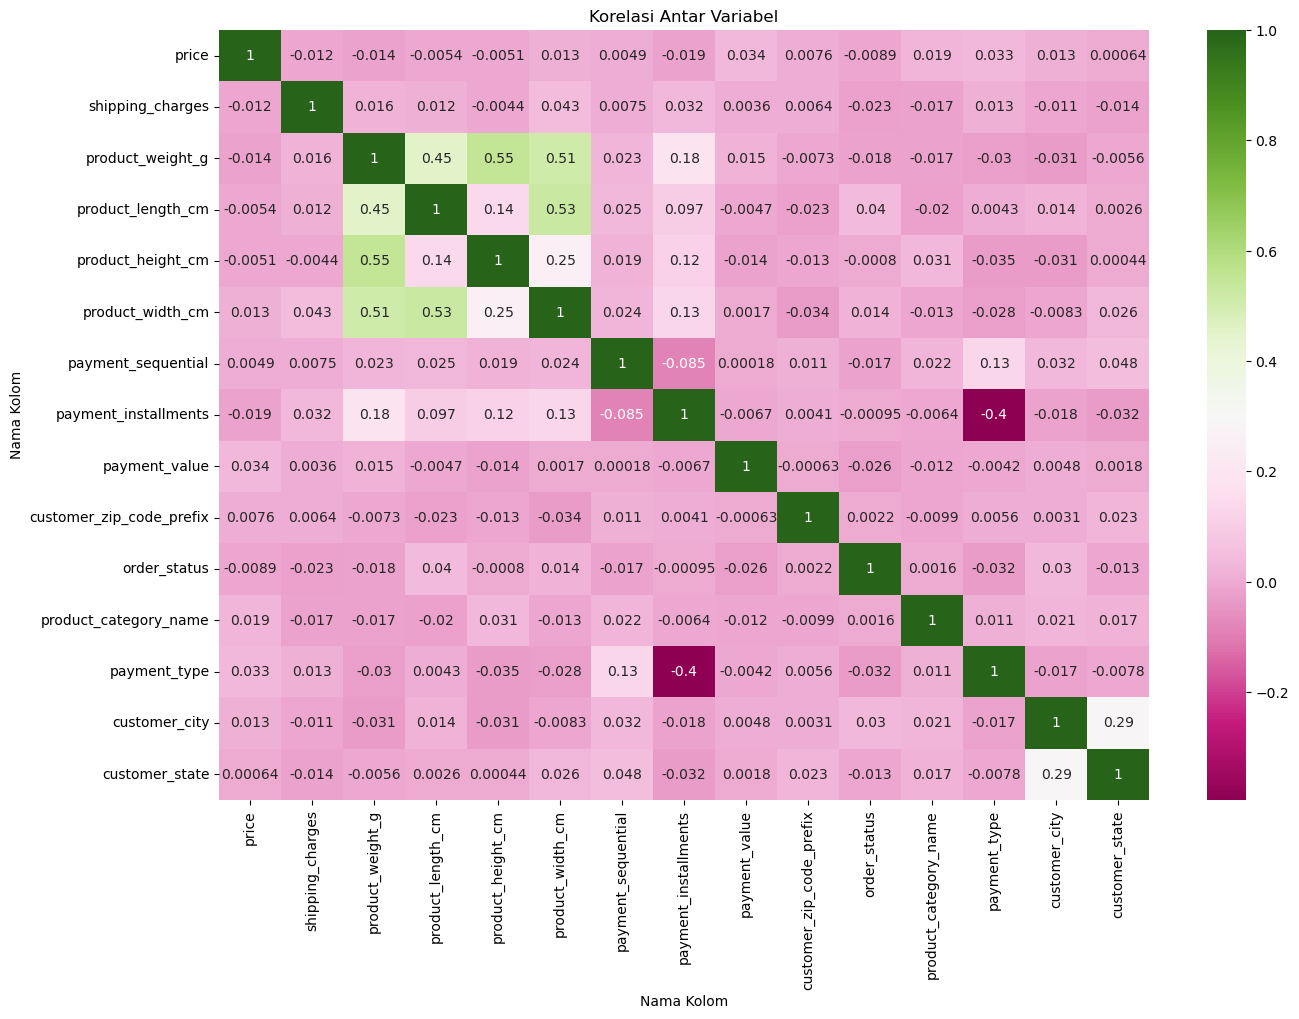

In [21]:
# Menghitung matriks korelasi
hm_data = df_final.corr(numeric_only=True)

# Memvisualisasikan heatmap untuk melihat korelasi antar variable
plt.figure(figsize=(15,10))
sns.heatmap(hm_data, annot=True,cmap="PiYG")
plt.title("Korelasi Antar Variabel")
plt.show()